<a href="https://colab.research.google.com/github/meyrele/learning/blob/master/Python_Brasil_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basedosdados

In [ ]:
import basedosdados as bd

In [ ]:
bd.list_datasets(filter_by='caged')


dataset_id: 
	br_me_caged 
-----------------------------------------------------------------------------------------------



In [ ]:
bd.list_dataset_tables('br_me_caged')


table_id: 
	dicionario 
-----------------------------------------------------------------------------------------------
table_id: 
	microdados_antigos 
-----------------------------------------------------------------------------------------------
table_id: 
	microdados_antigos_ajustes 
-----------------------------------------------------------------------------------------------
table_id: 
	microdados_estabelecimentos 
-----------------------------------------------------------------------------------------------
table_id: 
	microdados_movimentacoes 
-----------------------------------------------------------------------------------------------



In [ ]:
bd.get_table_description('br_me_caged', 'microdados_movimentacoes')

Microdados públicos do CAGED


Para saber mais acesse:
Website: https://basedosdados.org/dataset/br-me-caged
Github: https://github.com/basedosdados/mais/tree/master/bases/br_me_caged

Ajude a manter o projeto :)
Apoia-se: https://apoia.se/basedosdados

Publicado por
-------------
Nome: Diego
Código: https://github.com/basedosdados/mais/tree/master/bases/br_me_caged/code
Website: ftp://ftp.mtps.gov.br/pdet/microdados/CAGED/Tratado por
-----------
Nome: Diego
Código: https://github.com/basedosdados/mais/tree/master/bases/br_me_caged/code

Partições (Filtre a tabela por essas colunas para economizar dinheiro e tempo)
---------
- ano
- mes
- sigla_uf

Nível da Observação (i.e. a granularidade da linha)
-------------------
- movimentação

Cobertura Temporal
------------------
- 2020
- 2021

Cobertura Espacial
------------------
- brasil

Tratamento
----------
Unificação de todos os anos e meses, padronização do nomes de colunas, erros de valores, etc.

Frequencia de Atualização
-----------

In [ ]:
df = bd.read_table('br_me_caged', 'microdados_movimentacoes', limit=1000, 
              billing_project_id='python-brasil')

Downloading: 100%|██████████| 1000/1000 [00:01<00:00, 682.23rows/s]


In [ ]:
df.head()

,ano,mes,sigla_uf,id_municipio,id_municipio_6,cnae_2,cnae_2_subclasse,cnae_2_secao,cbo_2002,saldo_movimentacao,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,sexo,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,tipo_deficiencia,indicador_trabalho_intermitente,indicador_trabalho_parcial,salario_mensal,tamanho_estabelecimento_janeiro,indicador_aprendiz,fonte
0,2020,1,AC,1200609,120060,78205,7820500,N,514320,-1,999,7,39,44,3,3,0,1,31,0,0,0,0.0,8,0,1
1,2020,1,AC,1200401,120040,78205,7820500,N,334115,-1,101,5,30,44,6,3,0,1,31,0,0,0,1114.0,10,0,1
2,2020,1,AC,1200401,120040,49302,4930201,H,783225,-1,101,7,29,44,6,1,0,1,31,0,0,0,998.0,6,0,1
3,2020,1,AC,1200609,120060,78205,7820500,N,514320,-1,999,7,23,44,6,1,0,1,31,0,0,0,0.0,8,0,1
4,2020,1,AC,1200203,120020,45111,4511101,G,521115,1,101,7,29,44,3,1,0,1,20,0,0,0,0.0,3,0,1


In [ ]:
df = bd.read_sql(
    'SELECT * FROM `basedosdados.br_me_caged.microdados_antigos` LIMIT 1000',
     billing_project_id='python-brasil')

Downloading: 100%|██████████| 1000/1000 [00:04<00:00, 231.44rows/s]


In [ ]:
df.head()

,ano,mes,sigla_uf,id_municipio,id_municipio_6,admitidos_desligados,tipo_estabelecimento,tipo_movimentacao_desagregado,faixa_emprego_inicio_janeiro,tempo_emprego,quantidade_horas_contratadas,salario_mensal,saldo_movimentacao,indicador_aprendiz,indicador_trabalho_intermitente,indicador_trabalho_parcial,indicador_portador_deficiencia,tipo_deficiencia,cbo_2002,cnae_1,cnae_2,cnae_2_subclasse,grau_instrucao,idade,sexo,raca_cor,subsetor_ibge,bairros_sp,bairros_fortaleza,bairros_rj,distritos_sp,regiao_administrativas_df,regiao_administrativas_rj,regiao_administrativas_sp,regiao_corede,regiao_corede_04,regiao_gov_sp,regiao_senac_pr,regiao_senai_pr,regiao_senai_sp,subregiao_senai_pr
0,2007,1,AM,1302603,130260,01,01,01,04,0.0,30,1070.0,1,0,None,None,0,None,413225,000-1,64221,00000-1,09,45,02,08,18,0000,0000,0000,0000,0000,None,999,None,99,999,99,None,999,99
1,2007,1,AM,1302603,130260,02,01,06,04,16.0,30,1070.0,-1,0,None,None,0,None,413225,000-1,64221,00000-1,09,33,01,08,18,0000,0000,0000,0000,0000,None,999,None,99,999,99,None,999,99
2,2007,1,AM,1302603,130260,02,01,06,02,15.0,30,1070.0,-1,0,None,None,0,None,413225,000-1,64221,00000-1,09,35,02,08,18,0000,0000,0000,0000,0000,None,999,None,99,999,99,None,999,99
3,2007,1,AM,1302603,130260,02,01,05,03,7.0,40,1798.0,-1,0,None,None,0,None,413225,000-1,64221,00000-1,09,45,01,02,18,0000,0000,0000,0000,0000,None,999,None,99,999,99,None,999,99
4,2007,1,AM,1302603,130260,01,01,02,04,0.0,44,580.0,1,0,None,None,0,None,411010,000-1,45307,00000-1,07,25,02,08,16,0000,0000,0000,0000,0000,None,999,None,99,999,99,None,999,99


In [ ]:
df = bd.read_sql(
    """
    SELECT ano, sigla_uf, COUNT(*) n_escolas
    FROM `basedosdados.br_inep_censo_escolar.escola` 
    GROUP BY ano, sigla_uf
    ORDER BY ano, sigla_uf
    """,
    billing_project_id='python-brasil'
)

Downloading: 100%|██████████| 324/324 [00:01<00:00, 260.61rows/s]


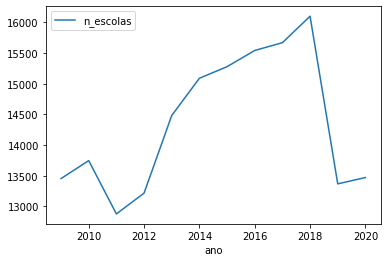

In [ ]:
df.query('sigla_uf == "RJ"').plot(x='ano', y='n_escolas')

In [ ]:
import plotly.express as px

In [ ]:
px.line(df, x='ano', y='n_escolas', color='sigla_uf')

In [ ]:
bd.read_sql(
    """
    SELECT ano, t2.mesorregiao, count(*) n_escolas
    FROM `basedosdados.br_inep_censo_escolar.escola` t1
    JOIN `basedosdados.br_bd_diretorios_brasil.municipio` t2
    ON t1.id_municipio = t2.id_municipio
    GROUP BY ano, t2.mesorregiao
    """, 
    billing_project_id='python-brasil'
)

Downloading: 100%|██████████| 1644/1644 [00:01<00:00, 903.56rows/s]


,ano,mesorregiao,n_escolas
0,2013,Distrito Federal,1294
1,2015,Leste Rondoniense,1911
2,2011,Norte do Amapá,162
3,2012,Leste Sergipano,1646
4,2009,Centro-Sul Mato-grossense,1034
...,...,...,...
1639,2018,Vale do Rio Doce,3020
1640,2018,Norte de Minas,3882
1641,2014,Extremo Oeste Baiano,1512
1642,2016,Ribeirão Preto,2231


In [ ]:
remuneracao = bd.read_sql(
    """
    SELECT 
    ano, sigla_uf,
    AVG(valor_remun_media_nominal) media_remuneracao,
    STDDEV_POP(valor_remun_media_nominal) std_remuneracao
    FROM `basedosdados.br_me_rais.microdados_vinculos` 
    GROUP BY ano, sigla_uf
    """,
    billing_project_id='python-brasil'
)

Downloading: 100%|██████████| 954/954 [00:01<00:00, 589.44rows/s]


In [ ]:
px.line(remuneracao.dropna().sort_values(by='ano'),
        x='ano', y='media_remuneracao', color='sigla_uf')